Adapted from https://github.com/hadrienj/deepLearningBook-Notes

In this notebook we cover some basics of Linear Algebra as seen in [Deep Learning Book](http://www.deeplearningbook.org/contents/linear_algebra.html) with a focus on using numpy


### 1. Scalars & Vectors

* **Scalar** is a *single* number, denoted as $x$


* **Vector** is an *array of scalars*, denoted by $\boldsymbol{x}$
    * Thus, a vector has $n$ scalars $x_1, x_2 \cdots x_n$
    * Note that indexing here begins with 1, unlike python (where it begins with 0)

$$
\boldsymbol{x} =\begin{bmatrix}
    x_1 \\
    x_2 \\
    \cdots \\
    x_n
\end{bmatrix}
$$

Let us now look how we can create an array using `numpy`

In [4]:
import numpy as np

x = np.array([[4],[5],[6]])
print(x)
print(x.shape)


[[4]
 [5]
 [6]]
(3, 1)


### 2. Matrices & Tensors

* **Matrix** is a 2D array of scalars, denoted by $\boldsymbol{X}$
$$
\boldsymbol{X}=
\begin{bmatrix}
    X_{1,1} & X_{1,2} & \cdots & X_{1,n} \\\\
    X_{2,1} & X_{2,2} & \cdots & X_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    X_{m,1} & X_{m,2} & \cdots & X_{m,n}
\end{bmatrix}
$$

    - This matrix has $m$ rows and $n$ columns
    - Each indvidual element such as $X_{1,1}$ is a *scalar*
    - If $m = n$, the matrix is known as **Square** Matrix


* **Tensor** is an array with **more than 2** axes, denoted as **X**
    * Think of Tensor as a generalization of an array with more than 2 axes

In [12]:
X = np.array([[4,5,7,10], 
              [10, 11, 13,11], 
              [56, 80, 90,12]])

print(X.shape)

X = X.reshape((-1,1))
print(X)
print(X.shape)


(3, 4)
[[ 4]
 [ 5]
 [ 7]
 [10]
 [10]
 [11]
 [13]
 [11]
 [56]
 [80]
 [90]
 [12]]
(12, 1)


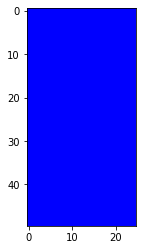

In [35]:
T = np.zeros((50,25,3),dtype='uint8')
T[ : , : ,2] = 255

import matplotlib.pyplot as plt

plt.imshow(T)
plt.show()


### 3. Transpose
For a 2D matrix transpose can be obtained as follows
$(A^T)_{i,j} = A_{j, i}$

For a vector, transpose makes the column vector into a row. Thus a column vector can also be represented as $\boldsymbol{x} = [x_1, x_2, x_3]^T$

In [31]:
X = X.reshape((3,4))
print(X)

print(X.T)

[[ 4  5  7 10]
 [10 11 13 11]
 [56 80 90 12]]
[[ 4 10 56]
 [ 5 11 80]
 [ 7 13 90]
 [10 11 12]]


In [49]:
# Transpose of Tensor
T.shape

#print(T[0][0])
print(T.shape)
T1 = np.transpose(T,axes=(2,0,1))
print(T1.shape)

print(T[0][0].shape)
print(T1[0][0].shape)

(50, 25, 3)
(3, 50, 25)
(3,)
(25,)


### 4. Broadcasting

* You can add a scalar to a vector, and numpy will add it to each element in the vector
    
    $\boldsymbol{x} + a = \boldsymbol{x}_i + a$
    
    
* Similarly you can add a vector to a matrix, and numpy will add the vector to each column of the matrix

In [68]:
x = np.array([1,2,3,4]) 
print(x)
print(x+4)

[1 2 3 4]
[5 6 7 8]


In [69]:
X = np.array([[10,20,30,40],
             [40,50,60,70]]) 

print(X)
print(X + x)

[[10 20 30 40]
 [40 50 60 70]]
[[11 22 33 44]
 [41 52 63 74]]


### 5. Matrix Multiplication

This is perhaps one operation that you would use quite frequently in any ML/DL model.
You should remember a few things about multiplication

* $\boldsymbol{C} = \boldsymbol{A} \boldsymbol{B}$ is only defined when the second dimension of $\boldsymbol{A}$ matches the first dimension of $\boldsymbol{B}$


* Further, if  $\boldsymbol{A}$ is of shape (m, n) and $\boldsymbol{B}$ of shape (n, p), then $\boldsymbol{C}$ is of shape (m, p) 


* This operation is concretely defined as $C_{i,j} = \sum_k A_{i, k} B_{k, j}$

    * $\boldsymbol{C}_{i, j}$ is computed by taking the dot product of $i$-th row of $\boldsymbol{A}$ with $j$-th column of $\boldsymbol{B}$


* A more useful method to think of matrix multiplcation is as **linear combination of columns** of $\boldsymbol{A}$ weighted by column entries of $\boldsymbol{B}$

<img src="images/mat-mul2.png" width="400" alt="Matrix Multiplication" title="Mat Mul">


<em>Matrix Multiplication. Image Credit: https://www.mpcm.org/visualizing-matrix-multiplication-as-a-linear-combination-eli-benderskys-website/</em>


In [72]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[0,2],
              [3,2]])

C = np.dot(A,B)
print(C)

[[ 6  6]
 [12 14]]


### 6. Element Wise multiplication: Hadamard product

Element wise multiplication $\boldsymbol{A} \odot \boldsymbol{B}$

Notice how numpy uses the * for this. Important to be careful, and not to confuse this with matrix multiplication

In [70]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[0,2],
              [3,2]])

A*B

array([[0, 4],
       [9, 8]])

### 7. Norms

* Norm can be thought of as a proxy for size of a vector. 

  We define $L^p$ norm $\Vert \boldsymbol{x}\Vert _p = (\sum |\boldsymbol{x}_i|^{p})^{\frac{1}{p}}$ 
  
  $p \ge 1, p \in \Re$
  
  
* Norm is a *function* that maps vectors to *non-negative* values. A norm satisfies the following properties:
    * $f(\boldsymbol{x}) = 0 =>  \boldsymbol{x} = 0$
    * $f(\boldsymbol{x} + \boldsymbol{y}) \le f(\boldsymbol{x}) + f(\boldsymbol{y})$ (Triangle inequality)
    * $\forall \ \alpha \in \Re, \ f(\alpha \ \boldsymbol{x}) = |\alpha|\ f(\boldsymbol{x})$
  
  
* $L^2$ norm is called the **Euclidean norm**, often $\Vert \boldsymbol{x} \Vert$ 
    * We work mostly with squared $L^2$ norm which can be computed as $\boldsymbol{x}^T \boldsymbol{x}$
    
    * Squared $L^2$ norm is easier to work with as its derivative is $2 * \boldsymbol{x}$
   
    * In some ML applications it is important to distinguish between elements that are zero and small but zero. Squared $L^2$ norm may not be the right choice as it grows very slowly near the origin
    
    
* **$L^1$ norm** is the absolute sum of all members of a vector

    * Useful when difference between 0 and non-zero elements is essential.


* **Max-Norm**: $L^\infty$: This simplifies to absoute value of the element with highest magnitude

In [93]:
x = np.array([-3,4])

lp2 = np.linalg.norm(x)
print(lp2)

lp1 = np.linalg.norm(x,ord=1)
print(lp1)

lpinf = np.linalg.norm(x,ord=np.inf)
print(lpinf)

5.0
7.0
4.0


### 8. Determinants
More Operations on Matrices - https://numpy.org/doc/stable/reference/routines.linalg.html

In [95]:
A = np.array([[1,2],
              [3,4]])


np.linalg.det(A)

-2.0000000000000004

### 9. Inverse 

In [113]:
A = np.array([[1,2],
              [3,4]])
Ainv = np.linalg.inv(A)

print(Ainv)

          
pinv = np.linalg.pinv(A)
print(pinv)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


### 10. Solve a System of Equations

https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve

In [85]:
a = np.array([[2,3], [3,1]])
b = np.array([8,5])

In [114]:
np.linalg.solve(a,b)

array([1., 2.])